In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing
## Training image processing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## validation image processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()  # Now it works fine!


## Building Convolution Layer

In [5]:

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128, 3)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\yasha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [10]:

cnn.add(Flatten())


In [11]:

cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))

In [12]:
cnn.add(Dense(units=38, activation='softmax'))

## Compiling and training phase

In [13]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 128, 128, 32) │         896 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)           │ (None, 126, 126, 32) │       9,248 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d               │ (None, 63, 63, 32)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)           │ (None, 63, 63, 64)   │      18,496 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)           │ (None, 61, 61, 64)   │      36,928 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_1             │ (None, 30, 30, 64)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_4 (Conv2D)           │ (None, 30, 30, 128)  │      73,856 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_5 (Conv2D)           │ (None, 28, 28, 128)  │     147,584 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_2             │ (None, 14, 14, 128)  │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_6 (Conv2D)           │ (None, 14, 14, 256)  │     295,168 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)           │ (None, 12, 12, 256)  │     590,080 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_3             │ (None, 6, 6, 256)    │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_8 (Conv2D)           │ (None, 6, 6, 512)    │   1,180,160 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)           │ (None, 4, 4, 512)    │   2,359,808 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_4             │ (None, 2, 2, 512)    │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ flatten (Flatten)           │ (None, 2048)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 1500)         │   3,073,500 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dropout (Dropout)           │ (None, 1500)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 38)           │      57,038 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4394s 2s/step - accuracy: 0.4599 - loss: 1.8874 - val_accuracy: 0.8388 - val_loss: 0.5120
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3165s 1s/step - accuracy: 0.8601 - loss: 0.4412 - val_accuracy: 0.9183 - val_loss: 0.2511
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3096s 1s/step - accuracy: 0.9179 - loss: 0.2534 - val_accuracy: 0.9214 - val_loss: 0.2463
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4943s 2s/step - accuracy: 0.9444 - loss: 0.1706 - val_accuracy: 0.9409 - val_loss: 0.1883
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4764s 2s/step - accuracy: 0.9584 - loss: 0.1263 - val_accuracy: 0.9327 - val_loss: 0.2260
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3171s 1s/step - accuracy: 0.9679 - loss: 0.0997 - val_accuracy: 0.9388 - val_loss: 0.2042
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 43747s 20s/step - accuracy: 0.9755 - loss: 0.0742 - val_accuracy: 0.9623 - val_loss: 0.1277
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4421s 2s/step - accuracy: 0.9799

## Evaluating Model

In [16]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1359s 619ms/step - accuracy: 0.9911 - loss: 0.0265
Training accuracy: 0.9915925860404968


In [17]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 330s 600ms/step - accuracy: 0.9607 - loss: 0.1558
Validation accuracy: 0.9628955125808716


## Saving Model

In [1]:

cnn.save('trained_plant_disease_model.keras')

NameError: name 'cnn' is not defined

In [19]:

training_history.history #Return Dictionary of history

{'accuracy': [0.6546695828437805,
  0.8792374730110168,
  0.9256561398506165,
  0.9488868117332458,
  0.9619460701942444,
  0.9699836373329163,
  0.9760153889656067,
  0.9798563122749329,
  0.9821040034294128,
  0.9857457876205444],
 'loss': [1.1611095666885376,
  0.3787098824977875,
  0.22850000858306885,
  0.15701885521411896,
  0.11543938517570496,
  0.09217493236064911,
  0.07248438894748688,
  0.060756828635931015,
  0.05405673384666443,
  0.04641975089907646],
 'val_accuracy': [0.8388345241546631,
  0.9183359742164612,
  0.9213521480560303,
  0.9409287571907043,
  0.9327338933944702,
  0.9387662410736084,
  0.9623264074325562,
  0.9547006487846375,
  0.9503756165504456,
  0.9628955125808716],
 'val_loss': [0.5119690895080566,
  0.2510663866996765,
  0.24626892805099487,
  0.1883496642112732,
  0.22595492005348206,
  0.20420144498348236,
  0.12766286730766296,
  0.16100908815860748,
  0.1800592839717865,
  0.14280493557453156]}

In [20]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [21]:

print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

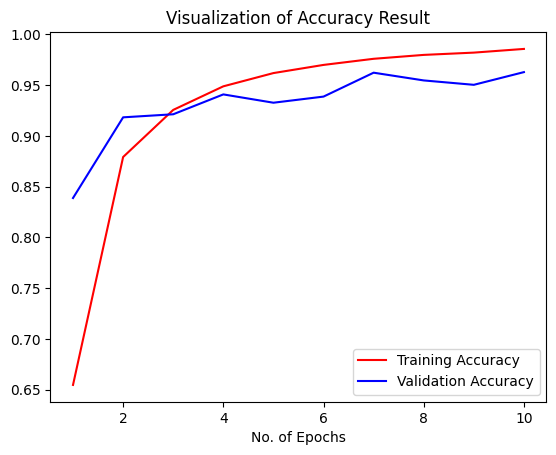

In [22]:

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [23]:
class_name = validation_set.class_names

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [25]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 492s 28ms/step


In [26]:

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [27]:

Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [28]:

predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [30]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

## Confusion Matrix Visualization

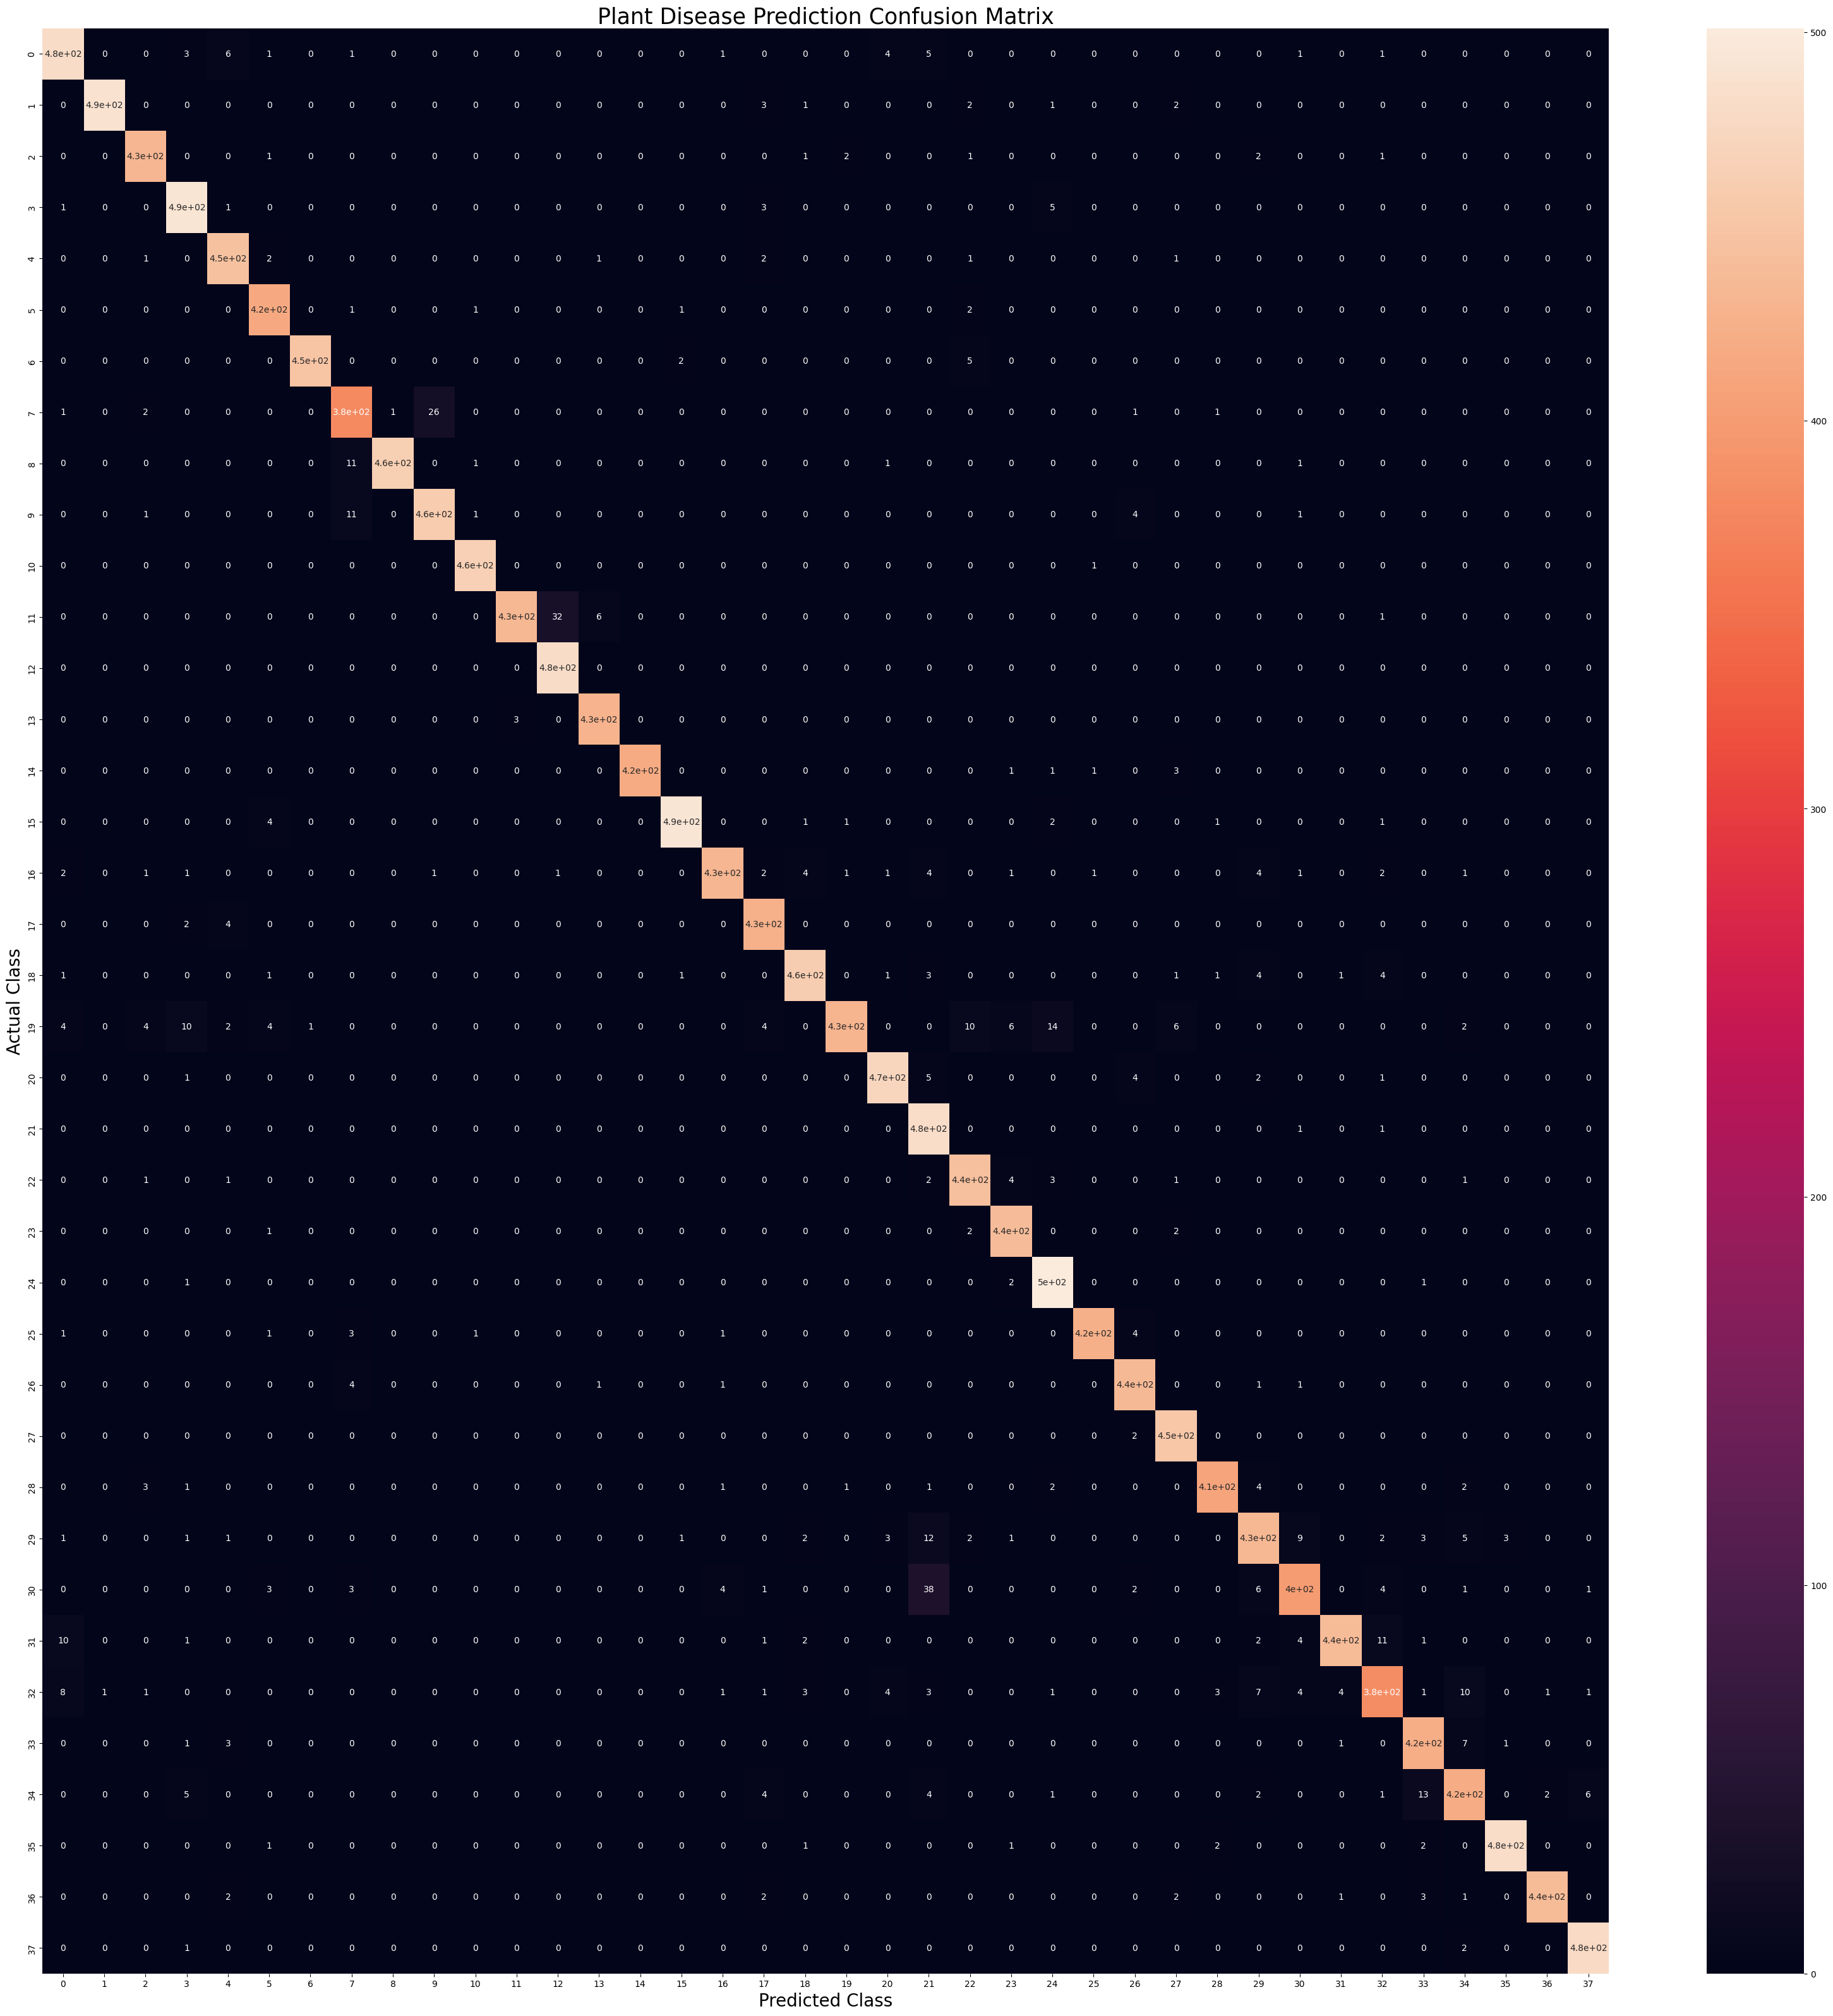

In [31]:

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [32]:
cnn.save("trained_plant_disease_model.h5")
